In [6]:
import torch.nn as nn
from torchvision import models

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Identity()
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
import torch

features = torch.load("features.pt", map_location="cpu")
print(type(features))

# If it's a tensor:
if torch.is_tensor(features):
    print(features.shape, features.dtype)
    print(features[:5])  # peek

# If it's a dict:
elif isinstance(features, dict):
    print(features.keys())
    for k, v in features.items():
        if torch.is_tensor(v):
            print(k, v.shape, v.dtype)


<class 'torch.Tensor'>
torch.Size([10000, 20, 512]) torch.float32
tensor([[[7.1761e-01, 0.0000e+00, 1.1327e+00,  ..., 1.4123e-01,
          2.0627e-02, 2.8229e-01],
         [5.2625e-01, 0.0000e+00, 7.3234e-01,  ..., 3.8789e-02,
          5.4017e-02, 3.5150e-01],
         [1.4496e-01, 5.6071e-03, 7.9219e-01,  ..., 4.1419e-02,
          1.9155e-02, 8.8829e-01],
         ...,
         [7.5749e-01, 8.7284e-02, 9.8640e-01,  ..., 2.9887e-02,
          9.2365e-02, 3.4932e-02],
         [3.8684e-01, 1.1497e-01, 1.0654e+00,  ..., 4.0691e-03,
          3.0697e-02, 5.9128e-02],
         [7.9702e-01, 1.1440e-01, 1.2729e+00,  ..., 0.0000e+00,
          3.8573e-02, 4.2918e-02]],

        [[7.8113e-01, 7.2043e-02, 1.3443e+00,  ..., 2.5409e-01,
          2.7790e-01, 1.2522e-02],
         [4.6322e-01, 4.7342e-02, 1.1010e+00,  ..., 2.4959e-01,
          1.7650e-01, 1.5948e-01],
         [8.5244e-01, 6.9516e-03, 1.0417e+00,  ..., 1.6974e-01,
          2.4859e-01, 8.8517e-02],
         ...,
         [1.1

In [8]:
import torch

features = torch.load("features.pt", map_location="cpu")
print(type(features))
print(features.shape, features.dtype)


<class 'torch.Tensor'>
torch.Size([10000, 20, 512]) torch.float32


In [10]:
#"models/lstm_model.pth"


obj = torch.load("lstm_model.pth", map_location="cpu")
print(type(obj))


<class 'collections.OrderedDict'>


In [13]:
import sys
from pathlib import Path

repo_root = Path.cwd().parent  # from notebooks/ up to project root
sys.path.append(str(repo_root))

import torch

from src.model import VideoPredictor

model = VideoPredictor()
state = torch.load("lstm_model.pth", map_location="cpu")
model.load_state_dict(state)
model.eval()


VideoPredictor(
  (lstm): LSTM(512, 256, num_layers=2, batch_first=True, dropout=0.2)
  (head): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=512, bias=True)
  )
)

repo_root: /home/limin/Documents/programming/video-anomaly-project


(np.float64(-0.5), np.float64(1131.5), np.float64(905.5), np.float64(-0.5))

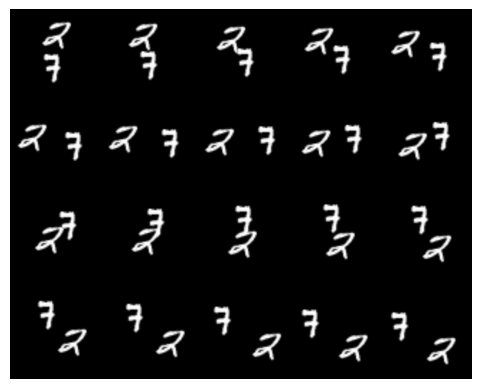

In [22]:
import sys
from pathlib import Path

repo_root = Path.cwd().parent  # from notebooks/ up to project root
print(f"repo_root: {repo_root}")
sys.path.append(str(repo_root))

from pathlib import Path

import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid

from src.dataset import MovingMNISTDataset

repo_root = Path.cwd().parent
data_path = repo_root / "data" / "mnist_test_seq.npy"

dataset = MovingMNISTDataset(str(data_path))




#dataset = MovingMNISTDataset("data/mnist_test_seq.npy")
seq = dataset[0]  # shape: (20, 3, 224, 224)

# unnormalize for display
mean = torch.tensor([0.485, 0.456, 0.406])[:, None, None]
std = torch.tensor([0.229, 0.224, 0.225])[:, None, None]
seq_vis = (seq * std + mean).clamp(0, 1)

grid = make_grid(seq_vis, nrow=5)
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")


features shape: torch.Size([10000, 20, 512]), flattened shape: (200000, 512)


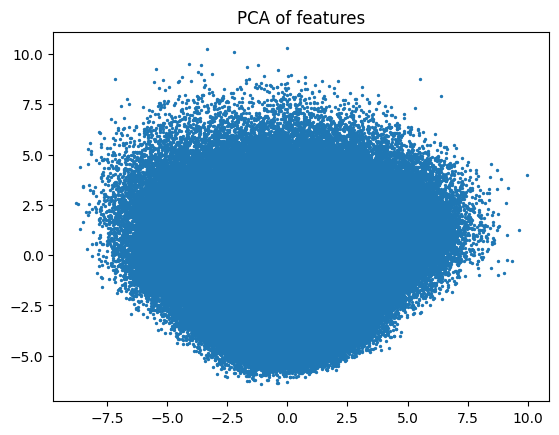

In [26]:
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA

features = torch.load("features.pt", map_location="cpu")  # [N, 20, 512]
flat = features.reshape(-1, 512).numpy()
print(f"features shape: {features.shape}, flattened shape: {flat.shape}")
pca = PCA(n_components=2)
proj = pca.fit_transform(flat)

plt.scatter(proj[:, 0], proj[:, 1], s=2)
plt.title("PCA of features")
plt.show()


In [30]:
from pathlib import Path

import imageio.v2 as imageio
import numpy as np

repo_root = Path.cwd().parent
data_path = repo_root / "data" / "mnist_test_seq.npy"
out_path = repo_root / "notebooks" / "moving_mnist_sample.mp4"

data = np.load(data_path)
seq = data[:, 0]  # (20, 64, 64)

with imageio.get_writer(out_path, fps=10, codec="libx264") as w:
    for frame in seq:
        frame_rgb = np.stack([frame]*3, axis=-1).astype("uint8")
        w.append_data(frame_rgb)

print(f"Saved: {out_path}")


Saved: /home/limin/Documents/programming/video-anomaly-project/notebooks/moving_mnist_sample.mp4
